In [1]:
import MySQLdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
myvars = {}
with open("dakhutch-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp07_db')
cursor = conn.cursor()
cursor.execute('select * from VAERSDATA');
vaers_data = cursor.fetchall()
cursor.execute('select * from VAERSSYMPTOMS');
vaers_symptoms = cursor.fetchall()
cursor.execute('select * from VAERSVAX');
vaers_vax = cursor.fetchall()
cursor.execute('select * from BIRTH_DEFECT');
birth_defect = cursor.fetchall()

In [3]:
# Start to clean the first csv file, VAERSDATA
vaers_data = np.array(vaers_data)
#vaers_data

In [4]:
def convert_to_boolean(colnum):
    for i in range (0,34121):
        if vaers_data[i,colnum] == 'Y':
            vaers_data[i,colnum] = 1
        else:
            vaers_data[i,colnum] = 0

In [5]:
# Convert Y/N attributes to boolean values

# Convert died column
convert_to_boolean(4)
# Convert life threatening column
convert_to_boolean(5)
# Convert er_visit column
convert_to_boolean(6)
# Convert hospital column
convert_to_boolean(7)
# Convert disabled column
convert_to_boolean(9)

# Convert hospdays empty values to 0
for i in range (0,34121):
    if vaers_data[i,8] == '':
        vaers_data[i,8] = 0

# Convert recovered empty values to 'U' or unknown
for i in range (0,34121):
    if vaers_data[i,10] == '':
        vaers_data[i,10] = 'U'

# Convert other_meds column to boolean based on set of input strings
for i in range (0,34121):
    if vaers_data[i,14] == 'None' or vaers_data[i,14] == 'none' or vaers_data[i,14] == 'unknown' or vaers_data[i,14] == 'Unknown' or vaers_data[i,14] == 'N/A':
        vaers_data[i,14] = 0
    else:
        vaers_data[i,14] = 1
        
# Convert cur_ill column to boolean based on set of input strings
for i in range (0,34121):
    if vaers_data[i,15] == 'None' or vaers_data[i,15] == 'none' or vaers_data[i,15] == 'No' or vaers_data[i,15] == 'no' or vaers_data[i,15] == 'N/A':
        vaers_data[i,15] = 0
    else:
        vaers_data[i,15] = 1
        
# Convert medical history column to boolean based on set of input strings
for i in range (0,34121):
    if (vaers_data[i,16] == 'Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None' or
    vaers_data[i,16] == 'Medical History/Concurrent Conditions: No adverse event (No reported medical history)' or
    vaers_data[i,16] == 'None' or vaers_data[i,16] == 'none' or vaers_data[i,16] == 'N/A' or
    vaers_data[i,16] == 'n/a' or vaers_data[i,16] == '' or vaers_data[i,16] == 'no' or
    vaers_data[i,16] == 'None.' or vaers_data[i,16] == 'NONE' or vaers_data[i,16] == 'No'):
        vaers_data[i,16] = 0
    else:
        vaers_data[i,16] = 1

In [6]:
# Change vaers_data from numpy array to a pandas df
data = pd.DataFrame(vaers_data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,916600,TX,33,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,Pcn and bee venom
1,916601,CA,73,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,"""Dairy"""
2,916602,WA,23,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,Shellfish
3,916603,WA,58,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,TX,47,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,Na


In [7]:
data[4].value_counts()

0    32164
1     1957
Name: 4, dtype: int64

In [8]:
# Start to clean the second csv file, VAERSSYMPTOMS
vaers_symptoms = np.array(vaers_symptoms)

In [9]:
# We need to derive the total number of symptoms each patient experiences
# Making count list which counts
# total no. of symptoms for each rows
count = []
for i in range(0,48110):
    x = 0
    for j in range(1,6):
        if vaers_symptoms[i,j] != '':
            x = x+1
    count.append(x)
len(count)

48110

In [10]:
# creating count into vertical array
count = np.array(count)
count = np.reshape(count,(48110,1))
count = np.array(count)

In [11]:
# appending count array to the symptoms array
vaers_symptoms2 = np.append(vaers_symptoms, count, axis = 1)
vaers_symptoms2.shape

(48110, 7)

In [12]:
# Deleting string symptoms columns and only keeping the VAERS_ID and Symptom count
vaers_symptoms3 = np.delete(vaers_symptoms2,[1,2,3,4,5],1)
vaers_symptoms3.shape

(48110, 2)

In [13]:
# Converting the data in the array to int data type
vaers_symptoms3 = vaers_symptoms3.astype(np.int)

# Creating a dictionary and removing multiple values of VAERS_ID
# and adding the symptom count of rows with same VAERS_ID
dict1 = {}
for i in vaers_symptoms3:
    if i[0] not in dict1:
        dict1[i[0]] = i[1]
    else:
        dict1[i[0]] = dict1[i[0]] + i[1]
        
# Checking if the length reduced or not
print(len(dict1))

34121


In [14]:
# Change symptoms from numpy array to a pandas df
vaers_symptoms4 = np.array(list(dict1.items()))
vaers_symptoms4.shape
symptoms = pd.DataFrame(vaers_symptoms4)
symptoms.head()

,0,1
0,916600,2
1,916601,2
2,916602,4
3,916603,3
4,916604,4


In [15]:
# Start to clean the third csv file, VAERSVAX
vaers_vax = pd.DataFrame(vaers_vax)
vaers_vax.head()

,0,1,2
0,0916600,COVID19,MODERNA
1,0916601,COVID19,MODERNA
2,0916602,COVID19,PFIZER\BIONTECH
3,0916603,COVID19,MODERNA
4,0916604,COVID19,MODERNA


In [16]:
# Drop duplicate rows based on ID
print(len(vaers_vax))
vax = vaers_vax.drop_duplicates()

34174


In [17]:
vax.shape

(33808, 3)

In [18]:
# Clean the fourth csv file, BIRTH_DEFECT
birth_defect = pd.DataFrame(birth_defect)
birth_defect.head()

,0,1
0,916600,
1,916601,
2,916602,
3,916603,
4,916604,


In [19]:
# Rename columns to appropriate labels
birth_defect2 = birth_defect.rename(columns = {0:'vaers_id',1:'birth_defect'}).copy()

In [20]:
# Convert ID column to an integer
birth_defect2['vaers_id'] = birth_defect2['vaers_id'].astype('int64')
birth_defect2.dtypes

vaers_id         int64
birth_defect    object
dtype: object

In [21]:
# Convert birth defect column to boolean valeus
# replacing birth defect empty values with 0
birth_defect2['birth_defect'] = birth_defect2['birth_defect'].replace('', 0)
# replacing birth defect Y values with 1
birth_defect2['birth_defect'] = birth_defect2['birth_defect'].replace('Y', 1)
birth_defect2['birth_defect'].value_counts()

0    34070
1       51
Name: birth_defect, dtype: int64

In [22]:
# data shape is 34121 by 18
print(data.shape)

# symptoms shape is now 34121 by 2
print(symptoms.shape)

# vax shape is 33808 by 3
print(vax.shape)

# birth defect is 34121 by 2
print(birth_defect.shape)

# difference between 34121 and 33808 should be removed as it is incomplete data

(34121, 18)
(34121, 2)
(33808, 3)
(34121, 2)


In [23]:
sum(data[2]=='')

3188

In [24]:
sum(data[1]=='')

5571

In [25]:
sum(vax.duplicated())

0

In [26]:
pd.set_option('display.max_rows', 10)
#vax[vax.duplicated()]
sum(vax[2]=='')

0

In [27]:
# Rename columns in the vaers data table to the appropriate labels
data2 = data.rename(columns = {0:'vaers_id',1:'state',2:'age_yrs',3:'sex',4:'died',5:'l_threat',6:'er_visit',7:'hospital',
                              8:'hospdays',9:'disable',10:'recovd',11:'vax_date',12:'onset_date',13:'numdays',14:'other_meds',
                              15:'cur_ill',16:'history',17:'allergies'}).copy()

In [28]:
data2.head()

,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,allergies
0,916600,TX,33,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,Pcn and bee venom
1,916601,CA,73,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,"""Dairy"""
2,916602,WA,23,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,Shellfish
3,916603,WA,58,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,TX,47,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,Na


In [29]:
# Rename columns in the vaers symptoms table to the appropriate labels
symptoms2 = symptoms.rename(columns = {0:'vaers_id',1:'symptom_count'}).copy()

In [30]:
symptoms2.head()

,vaers_id,symptom_count
0,916600,2
1,916601,2
2,916602,4
3,916603,3
4,916604,4


In [31]:
# Rename columns in the vaers vax table to the appropriate labels
vax2 = vax.rename(columns = {0:'vaers_id',1:'vax_type',2:'vax_manu'}).copy()

In [32]:
# Convert vaers id to an int to match the other tables
vax2['vaers_id'] = vax2['vaers_id'].astype('int64')

In [33]:
vax2.dtypes

vaers_id     int64
vax_type    object
vax_manu    object
dtype: object

In [34]:
# Convert vaers id to an int to match the other tables
symptoms2['vaers_id'] = symptoms2['vaers_id'].astype('int64')

In [35]:
symptoms2.dtypes

vaers_id         int64
symptom_count    int64
dtype: object

In [36]:
# Convert vaers id to an int to match the other tables
data2['vaers_id'] = data2['vaers_id'].astype('int64')

In [37]:
data2.dtypes

vaers_id       int64
state         object
age_yrs       object
sex           object
died          object
               ...  
numdays       object
other_meds    object
cur_ill       object
history       object
allergies     object
Length: 18, dtype: object

In [38]:
data2['history'].value_counts()

0    17553
1    16568
Name: history, dtype: int64

In [39]:
# Merge the four tables into one combined df
covid_df = data2.merge(birth_defect2.merge(vax2.merge(symptoms2, on='vaers_id'), on='vaers_id'), on='vaers_id')
pd.set_option('display.max_columns', None)
covid_df.head()

,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,allergies,birth_defect,vax_type,vax_manu,symptom_count
0,916600,TX,33,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,Pcn and bee venom,0,COVID19,MODERNA,2
1,916601,CA,73,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,"""Dairy""",0,COVID19,MODERNA,2
2,916602,WA,23,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,Shellfish,0,COVID19,PFIZER\BIONTECH,4
3,916603,WA,58,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,"Diclofenac, novacaine, lidocaine, pickles, tom...",0,COVID19,MODERNA,3
4,916604,TX,47,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,Na,0,COVID19,MODERNA,4


In [40]:
covid_df.shape
# 33808 rows 22 columns, checks out

(33808, 22)

In [41]:
covid_df['birth_defect'].value_counts()

# 51 patients have a birth defect, 33757 empty values

0    33757
1       51
Name: birth_defect, dtype: int64

In [42]:
covid_df['disable'].value_counts()

0    32992
1      816
Name: disable, dtype: int64

In [43]:
pd.set_option('display.max_rows', None)
covid_df['state'].value_counts()

      5499
CA    2557
TX    1782
NY    1770
FL    1637
IN    1143
IL    1130
OH    1059
PA     994
MI     911
MA     838
NJ     828
NC     744
VA     722
MD     692
AZ     648
WI     643
GA     625
WA     621
CO     613
MN     601
MO     553
CT     522
TN     521
KY     439
OR     359
IA     335
OK     330
LA     313
KS     292
AL     289
SC     280
AR     265
NE     264
MT     262
ME     234
UT     228
NM     227
WV     218
NH     203
PR     194
NV     194
AK     166
ID     156
MS     149
HI     132
SD     116
RI     112
VT     104
ND     101
DE      65
DC      55
WY      52
GU       7
VI       4
AS       3
MP       3
XB       1
Ca       1
MH       1
FM       1
Name: state, dtype: int64

In [44]:
covid_df['state'] = covid_df['state'].replace('Ca','CA',regex=True)
covid_df['state'] = covid_df['state'].replace(r'^\s*$','U',regex=True)

In [45]:
# Replace empty values with a numpy NaN value for age, then convert to a float type 
pd.set_option('display.max_rows', None)
covid_df['age_yrs'] = covid_df['age_yrs'].replace(r'^\s*$', np.nan, regex=True)
covid_df['age_yrs'] = covid_df['age_yrs'].astype('float')
covid_df['age_yrs'].dtypes
covid_df['age_yrs'].describe()

count    30772.000000
mean        51.461115
std         18.460348
min          0.080000
25%         37.000000
50%         50.000000
75%         65.000000
max        115.000000
Name: age_yrs, dtype: float64

In [46]:
covid_df['age_yrs'] = round(covid_df['age_yrs'],0)

In [47]:
print(len(covid_df))

33808


In [48]:
covid_df['sex'].value_counts()

F    24325
M     8649
U      834
Name: sex, dtype: int64

In [49]:
covid_df['vaers_id'].nunique()

33797

In [50]:
# How many duplicated rows do we have?
sum(covid_df['vaers_id'].duplicated())

11

In [51]:
# Dropping allergies, hospdays, recovd, other_meds, cur_ill, er_visit, vax_date, onset_date, vax_type columns
covid_df = covid_df.drop(['allergies','hospdays','recovd','other_meds','cur_ill','er_visit','vax_date','onset_date','vax_type'], axis=1)

In [52]:
covid_df.head()

,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count
0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2
1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2
2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4
3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3
4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4


In [53]:
# Replacing null values in numdays with np.nan
covid_df['numdays'] = covid_df['numdays'].replace('', np.nan)

In [54]:
covid_df['l_threat'] = covid_df['l_threat'].astype('int64')
covid_df['died'] = covid_df['died'].astype('int64')
covid_df['hospital'] = covid_df['hospital'].astype('int64')
covid_df['disable'] = covid_df['disable'].astype('int64')
covid_df[['l_threat','died','hospital','disable']].dtypes

l_threat    int64
died        int64
hospital    int64
disable     int64
dtype: object

In [55]:
# Adding new column 'count' which count the no. of severity criteria - l_threat,died,hospital,disable,birth_defect
covid_df["Count"] = covid_df[['l_threat','died','hospital','disable','birth_defect']].sum(axis=1)

In [56]:
covid_df['Count'].value_counts()

0    27012
1     5431
2     1219
3      142
4        4
Name: Count, dtype: int64

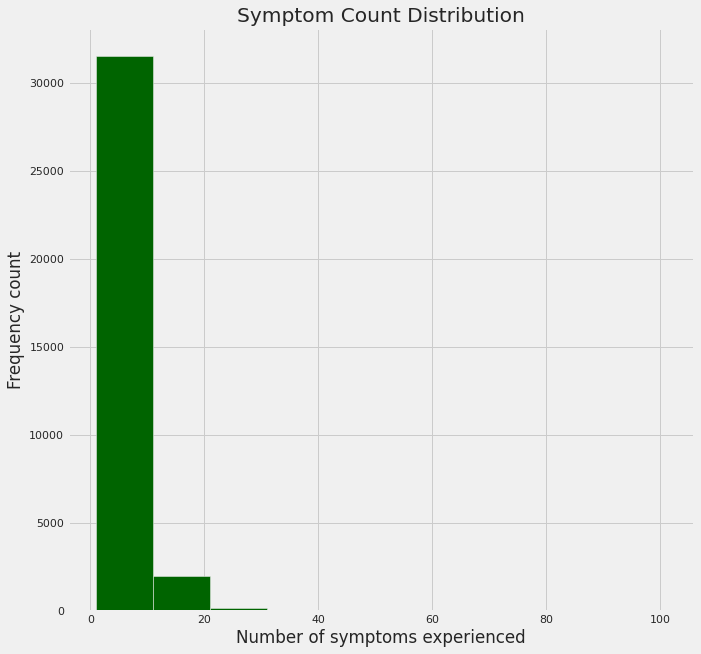

In [195]:
# Distribution of symptom count in our dataset
plt.style.use('fivethirtyeight')
plt.hist(covid_df['symptom_count'], color='darkgreen')
plt.xlabel('Number of symptoms experienced')
plt.ylabel('Frequency count')
plt.title('Symptom Count Distribution')
plt.show()

In [57]:
# Create a df of just State and Symptom Count, export as csv to use in Tableau for heatmap (average symptom count by state)
state_symptoms = covid_df[['state','symptom_count']]
state_symptoms.to_csv('state_symptoms',header = ['State','Symptom Count'], index=False)

In [58]:
#Creating new list based on the no. of count. If count = 0, then Severity = 0. else Severity = 1.
Sever = []
for i in covid_df['Count']:
    if i == 0:
        Sever.append(0)
    else:
        Sever.append(1)

In [59]:
#Adding Sever list to dataframe as a new column - severity
covid_df['severity'] = Sever

In [60]:
covid_df.shape

(33808, 15)

In [61]:
# Change unknown or 'U' sex values to Na.
covid_df['sex'] = covid_df['sex'].replace('U', np.nan ,regex=True)

# Remove Na value rows from sex and age columns and assign to covid_df2.
covid_df2 = covid_df.dropna(subset = ['age_yrs', 'sex'])

# Drop 11 duplicate rows from covid_df2
covid_df2 = covid_df2.drop_duplicates(subset=['vaers_id'])

# Check how many rows of data there are now
print(covid_df2['vaers_id'].nunique())

30596


In [62]:
# Remove rows with NA value for numdays
covid_df2 = covid_df2.dropna(subset = ['numdays'])
covid_df2['numdays'] = covid_df2['numdays'].astype('int64')

In [63]:
# Drop all rows of data where numdays > 45. Based on logic from when
# vaccines were released and dataset was published
covid_df2.drop(covid_df2[covid_df2['numdays'] > 45].index, inplace=True)
covid_df2['numdays'].describe()

count    29451.000000
mean         2.715561
std          5.114845
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         45.000000
Name: numdays, dtype: float64

In [64]:
# Drop all rows of data where symptom count > 25. Based on logic from first hand
# experience on extreme case of vaccine reactions
covid_df2.drop(covid_df2[covid_df2['symptom_count'] > 25].index, inplace=True)
covid_df2['symptom_count'].describe()

count    29285.000000
mean         4.733345
std          3.465160
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         25.000000
Name: symptom_count, dtype: float64

In [65]:
covid_df2.shape

(29285, 15)

In [66]:
# Replace 'unknown manufacturer' with NaN.
covid_df2['vax_manu'] = covid_df['vax_manu'].replace('UNKNOWN MANUFACTURER', np.nan, regex=True)

# Remove Na value rows from vax manufacturer column and overwrite covid_df2.
covid_df2 = covid_df2.dropna(subset = ['vax_manu'])

# Check how many rows of data now
print(covid_df2['vaers_id'].nunique())

29273


In [67]:
covid_df2.head()

,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity
0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2,0,0
1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2,0,0
2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4,0,0
3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3,0,0
4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4,0,0


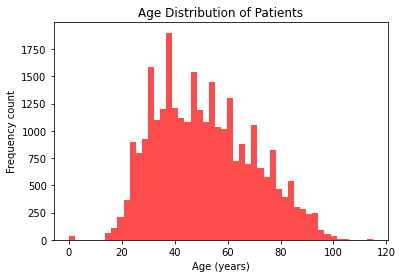

In [68]:
# Age distribution visual
plt.hist(covid_df2['age_yrs'],color="red",bins = 50, alpha=0.7)
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency count') 
plt.show()

In [69]:
covid_df2['history'].value_counts(dropna=False)
# Medical history is a boolean value with 0 representing no prior med hisory and 1 representing any sort of med history
# 14,878 with a 1.  14,396 with a 0.

1    14878
0    14395
Name: history, dtype: int64

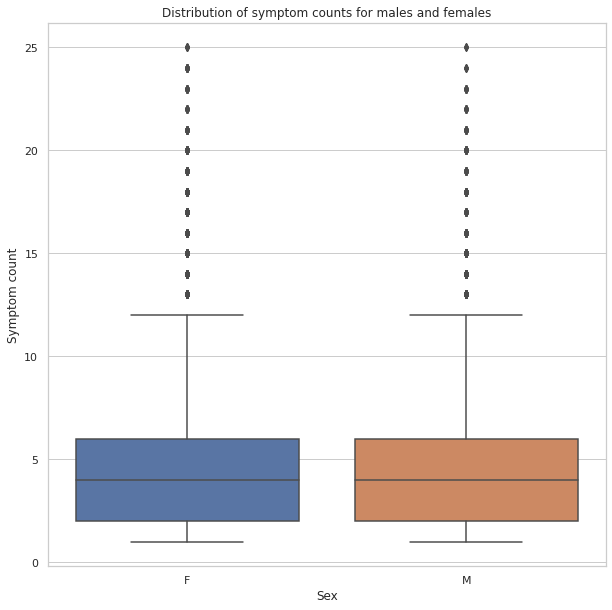

In [70]:
# Gender vs. Symptom count boxplot 
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
sns.boxplot(x='sex', y='symptom_count', data=covid_df2)
plt.title('Distribution of symptom counts for males and females')
plt.xlabel('Sex')
plt.ylabel('Symptom count')
plt.show()

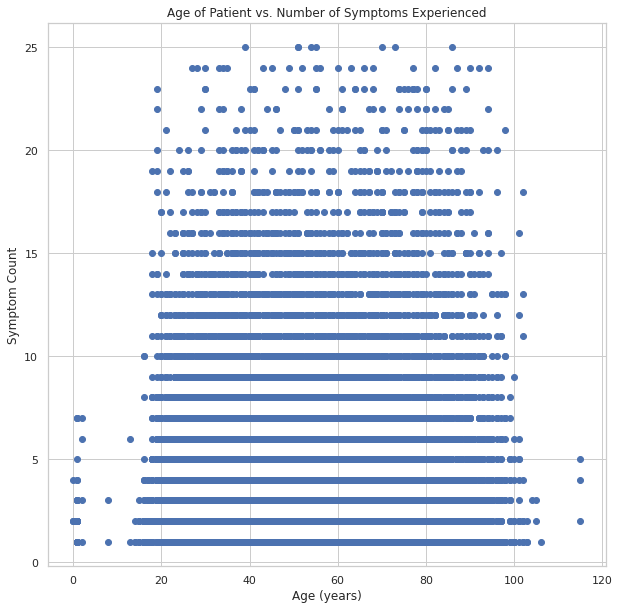

In [71]:
# Scatter plot visual of age vs. symptom count
plt.figure(figsize=(10,10))
plt.scatter(x=covid_df2['age_yrs'], y=covid_df2['symptom_count'])
plt.xlabel('Age (years)')
plt.ylabel('Symptom Count')
plt.title('Age of Patient vs. Number of Symptoms Experienced')
plt.show()

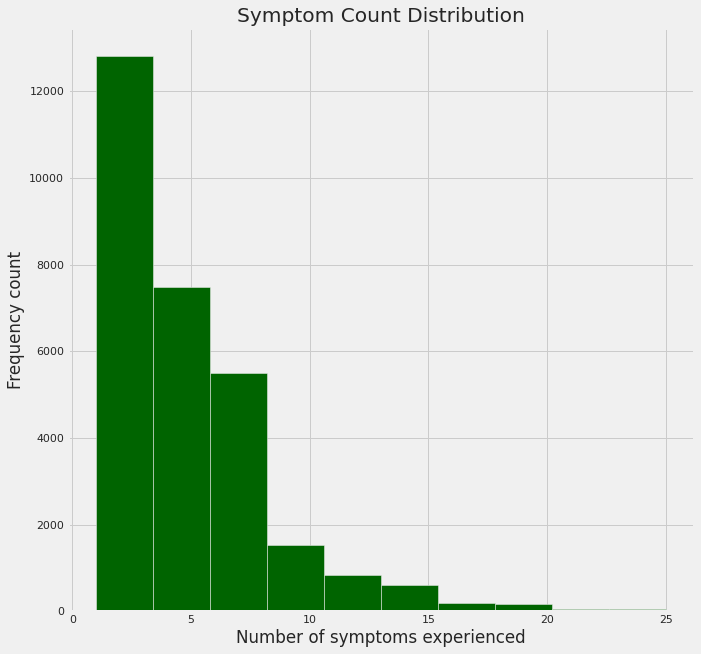

In [72]:
# Distribution of symptom count in our dataset
plt.style.use('fivethirtyeight')
plt.hist(covid_df2['symptom_count'], color='darkgreen')
plt.xlabel('Number of symptoms experienced')
plt.ylabel('Frequency count')
plt.title('Symptom Count Distribution')
plt.show()

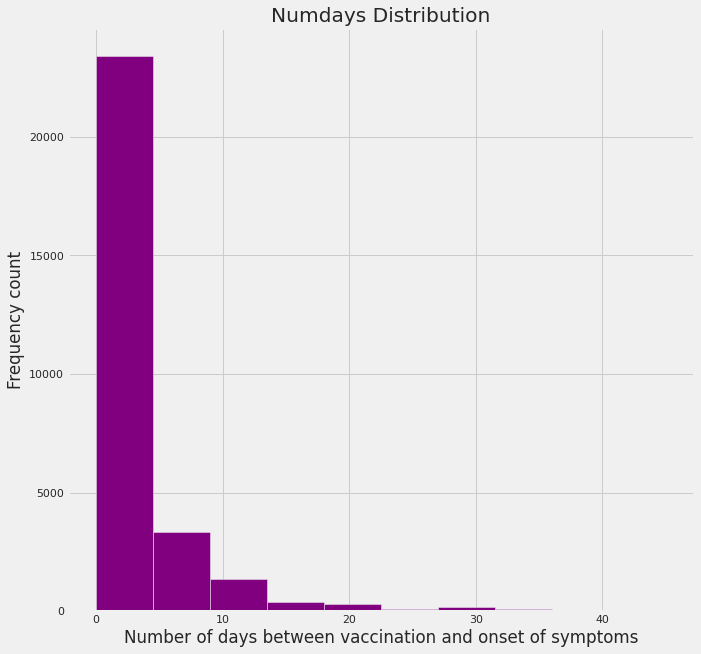

In [193]:
# Distribution of 'numdays' in our dataset
plt.style.use('fivethirtyeight')
plt.hist(covid_df2['numdays'], color='purple')
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Frequency count')
plt.title('Numdays Distribution')
plt.show()

In [194]:
# average symptom count of 4.7
covid_df2[['symptom_count', 'numdays']].describe()

,symptom_count,numdays
count,29273.000000,29273.000000
mean,4.732621,2.700372
std,3.463876,5.093808
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,1.000000
75%,6.000000,3.000000
max,25.000000,45.000000


In [74]:
# Let's take a look at our continuous variables
covid_df2[['age_yrs','numdays','symptom_count']].describe()

,age_yrs,numdays,symptom_count
count,29273.000000,29273.000000,29273.000000
mean,51.188536,2.700372,4.732621
std,18.368814,5.093808,3.463876
min,0.000000,0.000000,1.000000
25%,37.000000,0.000000,2.000000
50%,49.000000,1.000000,4.000000
75%,65.000000,3.000000,6.000000
max,115.000000,45.000000,25.000000


In [75]:
covid_df2 = covid_df2.reset_index()

In [76]:
# Creating the target variable by giving a type a severity a value between 0 and 6
Target = []

for i in range(0,29273):
    if covid_df2['Count'][i] == 0:
        Target.append(0)
    elif covid_df2['Count'][i] == 1:
        if covid_df2['l_threat'][i] == 1:
            Target.append(1)
        elif covid_df2['died'][i] == 1:
            Target.append(6)
        elif covid_df2['hospital'][i] == 1:
            Target.append(2)
        elif covid_df2['disable'][i] == 1:
            Target.append(3)
        elif covid_df2['birth_defect'][i] == 1:
            Target.append(4)
    else:
        Target.append(5)


In [77]:
# Adding Target list to dataframe as a new column - Target
covid_df2['Target'] = Target

In [78]:
covid_df2['Target'].value_counts()

0    23329
2     2515
6     1359
5     1246
3      448
1      340
4       36
Name: Target, dtype: int64

In [79]:
# Creating array of Target collumn
NTarget = np.array(covid_df2['Target'])

In [80]:
# Names of Target variables
NTarget_Names = ['No Severity','Life Threatening','Hospitalized','Disabled','Birth Defect','Very Serious','Died']

In [81]:
# Creating a new column by name of severity_name to identify the type of severity
covid_df2['severity_name'] = np.array([NTarget_Names[i] for i in NTarget])

In [82]:
# Should match up with 'Target' column
covid_df2['severity_name'].value_counts()

No Severity         23329
Hospitalized         2515
Died                 1359
Very Serious         1246
Disabled              448
Life Threatening      340
Birth Defect           36
Name: severity_name, dtype: int64

In [83]:
# Assigning sex column a number and creating the new list by sex_num
# Male is assigned to 0, female assigned to 1
sex_num = []
for i in range(0,29273):
    if covid_df2['sex'][i] == 'M':
        sex_num.append(0)
    else:
        sex_num.append(1)

In [84]:
# Creating new column by name of sex_data and using the newly created list sex_data
covid_df2['sex_data'] = sex_num

In [85]:
# Assigning vax_manu a number and creating the new list by vaxmanu
# Moderna assigned to 0, Pfizer assigned to 1, Janssen assigned to 2
vaxmanu = []
for i in range(0,29273):
    if covid_df2['vax_manu'][i] == 'MODERNA':
        vaxmanu.append(0)
    elif covid_df2['vax_manu'][i] == 'PFIZER\BIONTECH':
        vaxmanu.append(1)
    elif covid_df2['vax_manu'][i] == 'JANSSEN':
        vaxmanu.append(2)

In [86]:
# Adding the new column vax_manu_data taking values from newly created list - vaxmanu.
covid_df2['vax_manu_data'] = vaxmanu

In [87]:
covid_df2['vax_manu_data'].value_counts()
# Moderna ~ 15k, Pfizer ~ 13k, JJ ~ 1k

0    15092
1    13091
2     1090
Name: vax_manu_data, dtype: int64

In [88]:
# december 11, 2020 first pfizer vaccines
# no more than 25 symptom counts from first hand experience at a pharmaceutical company
# jan 14, 2021 dataset created

In [89]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data
0,0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2,0,0,0,No Severity,1,0
1,1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2,0,0,0,No Severity,1,0
2,2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1
3,3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3,0,0,0,No Severity,1,0
4,4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4,0,0,0,No Severity,1,0


In [90]:
# Creating a new dataframe using the columns required and the target variable (severity_name)
covid_df_target = covid_df2[['age_yrs','sex_data','vax_manu_data','history','severity_name']]

In [91]:
covid_df_target.head()

,age_yrs,sex_data,vax_manu_data,history,severity_name
0,33.0,1,0,0,No Severity
1,73.0,1,0,1,No Severity
2,23.0,1,1,0,No Severity
3,58.0,1,0,1,No Severity
4,47.0,1,0,0,No Severity


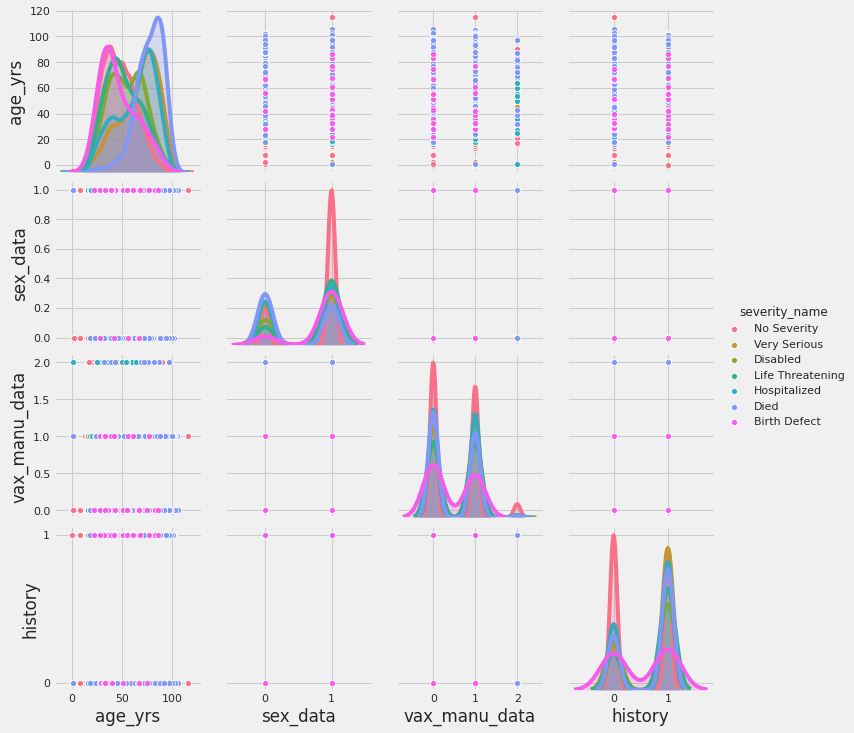

In [92]:
# Pairplot of the variables
sns.pairplot(covid_df_target, hue='severity_name')

In [93]:
# Generating the test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(covid_df_target[['age_yrs','sex_data','vax_manu_data','history']], NTarget , test_size=0.5, stratify=NTarget, random_state=123456)


In [94]:
# Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [95]:
# Accuracy evaluation
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.79
Mean accuracy score: 0.794


In [96]:
# Predicting a particular value
rf.predict([[90,0,1,1]])

array([6])

In [97]:
# Metrics classification report
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

# Note the low scores for all classes except class 0

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     11665
           1       0.00      0.00      0.00       170
           2       0.25      0.09      0.14      1258
           3       0.00      0.00      0.00       224
           4       0.00      0.00      0.00        18
           5       0.14      0.03      0.05       623
           6       0.30      0.20      0.24       679

    accuracy                           0.79     14637
   macro avg       0.22      0.19      0.19     14637
weighted avg       0.71      0.79      0.74     14637



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


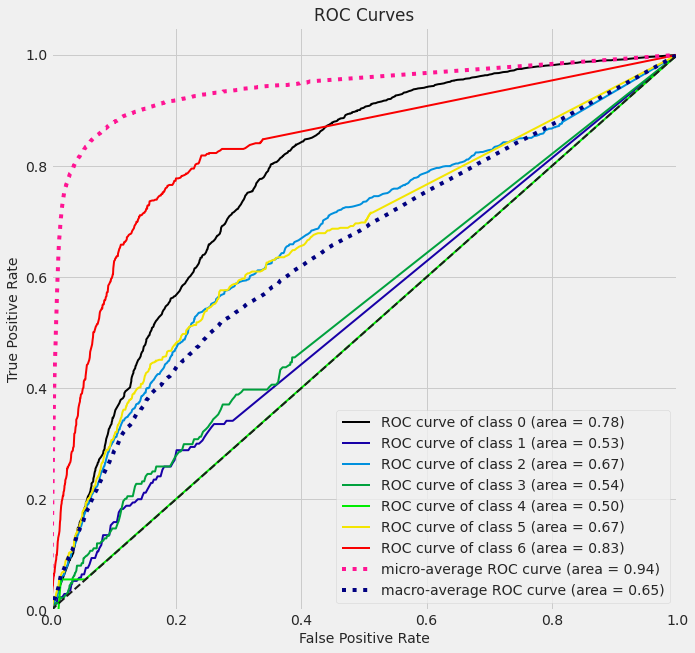

In [98]:
# ROC curve for random forest model

plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = rf.predict_proba(X_test)

import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

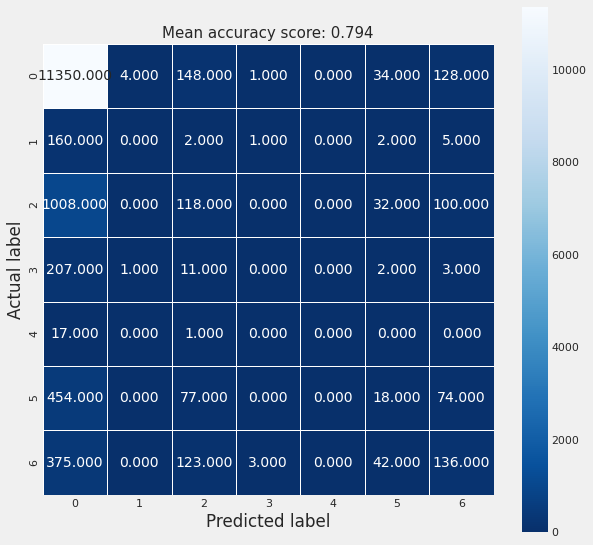

In [99]:
# Heat map for actual and predicted labels

cm = metrics.confusion_matrix(y_test, predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy:.3}'
plt.title(all_sample_title, size = 15);

In [100]:
# Using logistic regression for the same model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print(score)

0.8003006080480973


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
# Classification report for logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11665
           1       0.00      0.00      0.00       170
           2       0.18      0.02      0.03      1258
           3       0.00      0.00      0.00       224
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00       623
           6       0.37      0.17      0.23       679

    accuracy                           0.80     14637
   macro avg       0.19      0.17      0.17     14637
weighted avg       0.68      0.80      0.73     14637



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


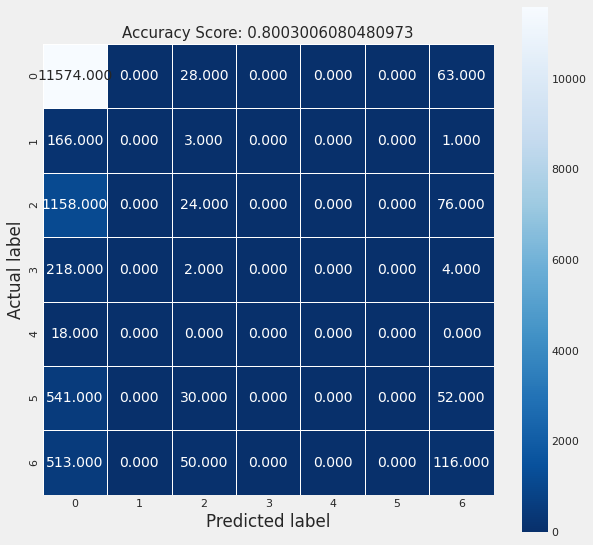

In [102]:
# Heat map for actual and predicted values

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

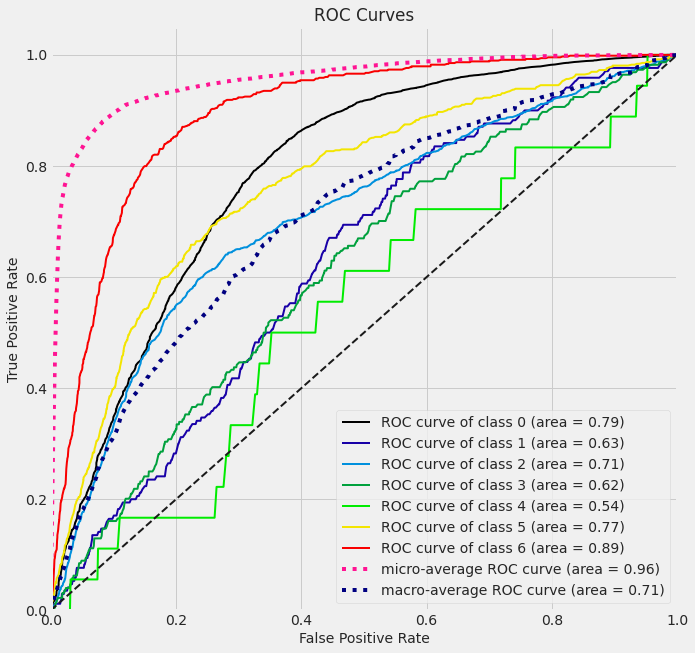

In [103]:
# ROC curves for logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = logreg.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

In [104]:
# Using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.7433900389424062


In [105]:
# Classification report for gradient boosting classifier

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11665
           1       0.00      0.00      0.00       170
           2       0.00      0.00      0.00      1258
           3       0.02      0.08      0.03       224
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00       623
           6       0.23      0.59      0.33       679

    accuracy                           0.74     14637
   macro avg       0.16      0.22      0.18     14637
weighted avg       0.71      0.74      0.72     14637



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


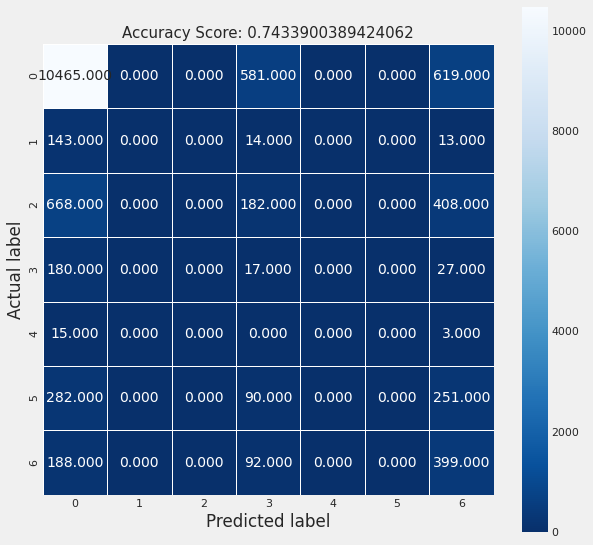

In [106]:
# Heat map for actual and predicted values for gradient boosting classification

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

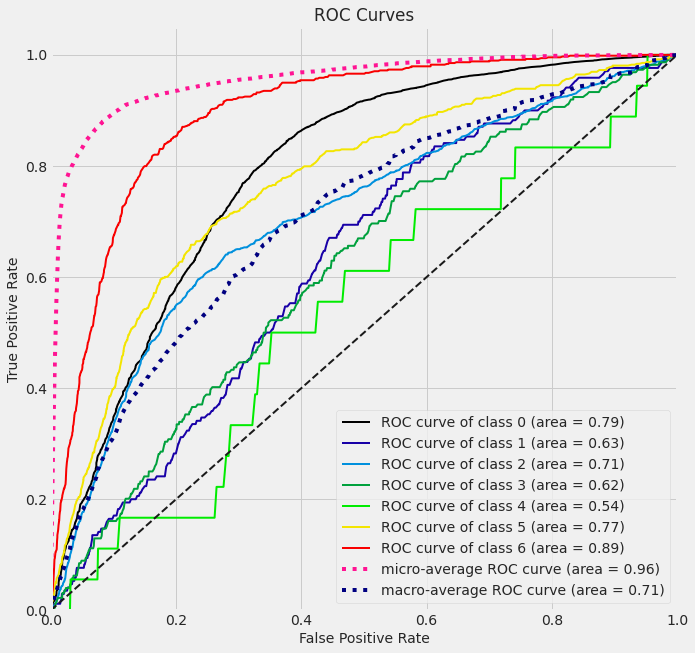

In [107]:
# ROC curve for gradient boosting classifier
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# Now reducing the target variables from 7 to 2 (severe-side effects and no severity)

In [108]:
# Creating array of Severity column
Nseverity = np.array(covid_df2['severity'])

In [109]:
# Names of severity variables
Nseverity_Names = ['No Severity','Severe Side-effects']

In [110]:
# Creating a new column by name of severity_type to identify the type of severity
covid_df2['severity_type'] = np.array([Nseverity_Names[i] for i in Nseverity])

In [111]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
1,1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
2,2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1,No Severity
3,3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3,0,0,0,No Severity,1,0,No Severity
4,4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4,0,0,0,No Severity,1,0,No Severity


In [112]:
covid_df2['severity_type'].value_counts()
# 23329 instances of no severity, 5944 cases of severe side-effects

No Severity            23329
Severe Side-effects     5944
Name: severity_type, dtype: int64

In [113]:
# Creating a new dataframe using the columns required and the target variable (severity_type)
covid_df_target2 = covid_df2[['age_yrs','sex_data','vax_manu_data','history','severity_type']]

In [114]:
covid_df_target2.head()

,age_yrs,sex_data,vax_manu_data,history,severity_type
0,33.0,1,0,0,No Severity
1,73.0,1,0,1,No Severity
2,23.0,1,1,0,No Severity
3,58.0,1,0,1,No Severity
4,47.0,1,0,0,No Severity


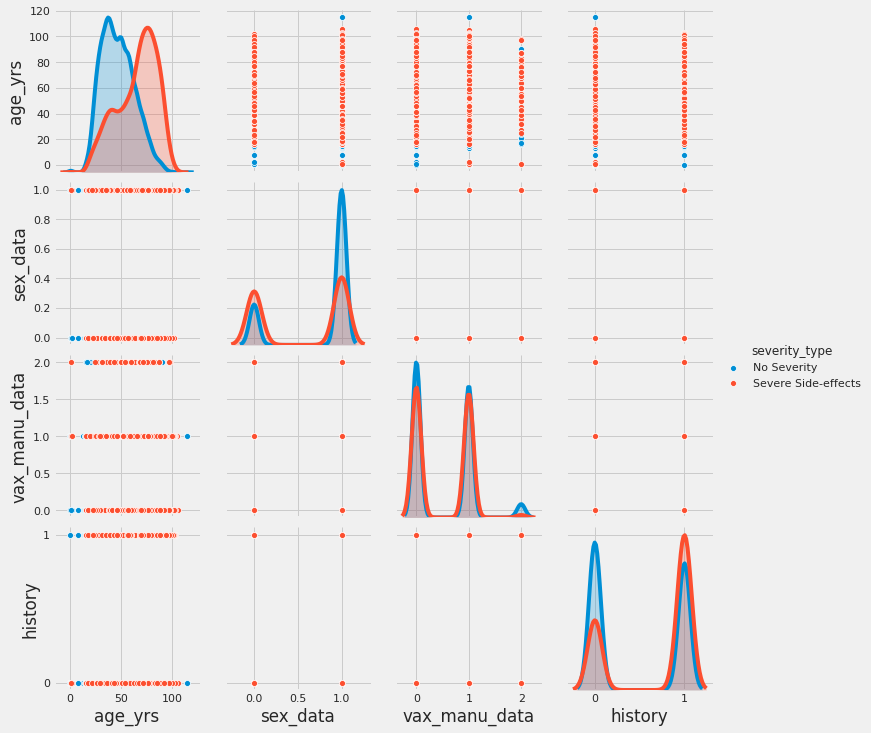

In [115]:
# Pairplot of the variables
sns.pairplot(covid_df_target2, hue='severity_type')

In [116]:
# Generating the test and train sets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(covid_df_target2[['age_yrs','sex_data','vax_manu_data','history']], covid_df_target2[['severity_type']] , test_size=0.2, stratify=Nseverity, random_state=123456)


In [117]:
# Random Forest classification for two classes

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train1, y_train1)

<ipython-input-117-9c17c0c50dc3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train1, y_train1)


RandomForestClassifier(oob_score=True, random_state=123456)

In [118]:
# Accuracy of Random Forest model

predicted1 = rf.predict(X_test1)
accuracy = accuracy_score(y_test1, predicted1)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.836
Mean accuracy score: 0.833


<AxesSubplot:>

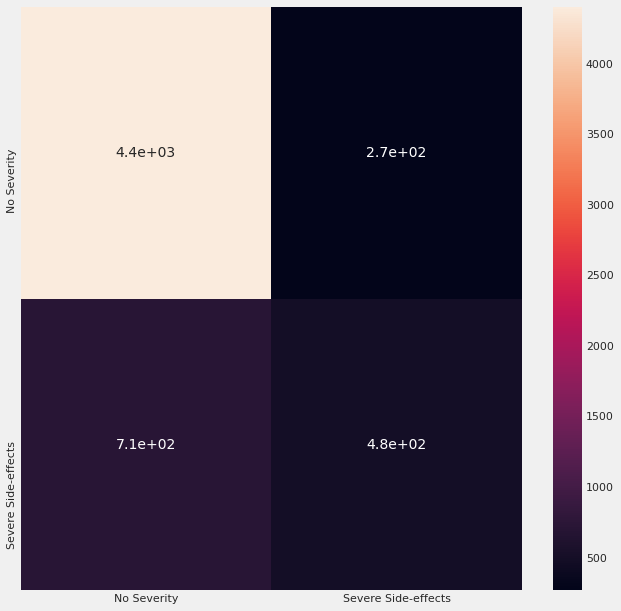

In [119]:
# Heatmap of random forest
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test1, predicted1), columns=Nseverity_Names, index=Nseverity_Names)
sns.heatmap(cm, annot=True)

In [120]:
# Predicting a particular value
rf.predict([[84,1,0,1]])

array(['Severe Side-effects'], dtype=object)

In [121]:
# Metrics classification report for random forest
print(metrics.classification_report(y_test1, predicted1))

                     precision    recall  f1-score   support

        No Severity       0.86      0.94      0.90      4666
Severe Side-effects       0.64      0.40      0.50      1189

           accuracy                           0.83      5855
          macro avg       0.75      0.67      0.70      5855
       weighted avg       0.82      0.83      0.82      5855



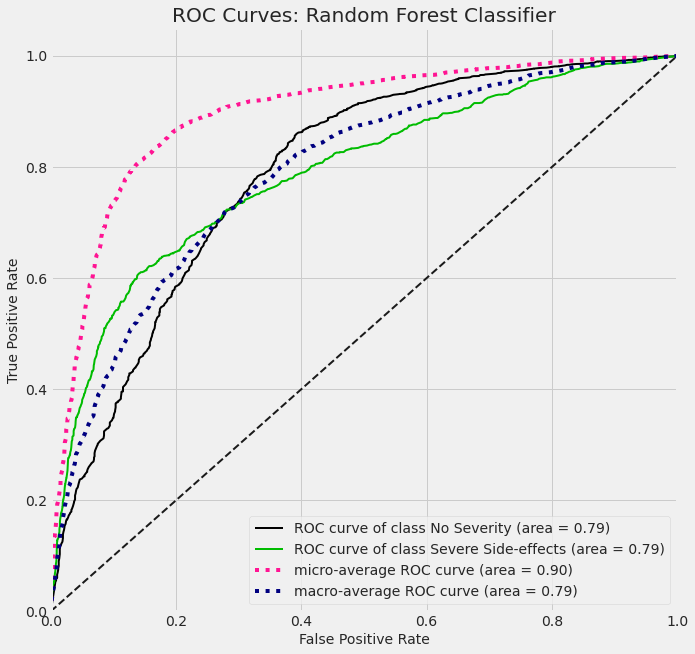

In [122]:
# ROC curve for random forest classification

plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = rf.predict_proba(X_test1)

skplt.metrics.plot_roc(y_test1, predicted_probas1)
plt.title('ROC Curves: Random Forest Classifier')
plt.show()

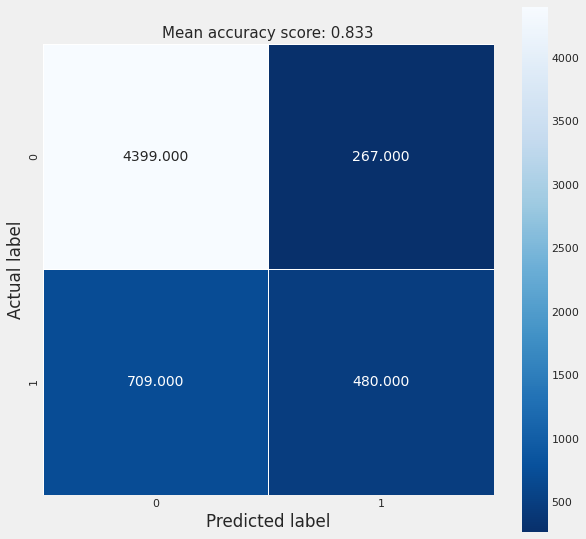

In [123]:
# Heat map for predicted and actual values for random forest classification

cm = metrics.confusion_matrix(y_test1, predicted1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy:.3}'
plt.title(all_sample_title, size = 15);

In [124]:
# Now using logistic regression for the same 2-class classification
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
predictions1 = logreg.predict(X_test1)
score = logreg.score(X_test1, y_test1)
print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8348420153714774


In [125]:
# Classification report for logistic regression
print(classification_report(y_test1, predictions1))

                     precision    recall  f1-score   support

        No Severity       0.85      0.96      0.90      4666
Severe Side-effects       0.68      0.36      0.47      1189

           accuracy                           0.83      5855
          macro avg       0.77      0.66      0.69      5855
       weighted avg       0.82      0.83      0.81      5855



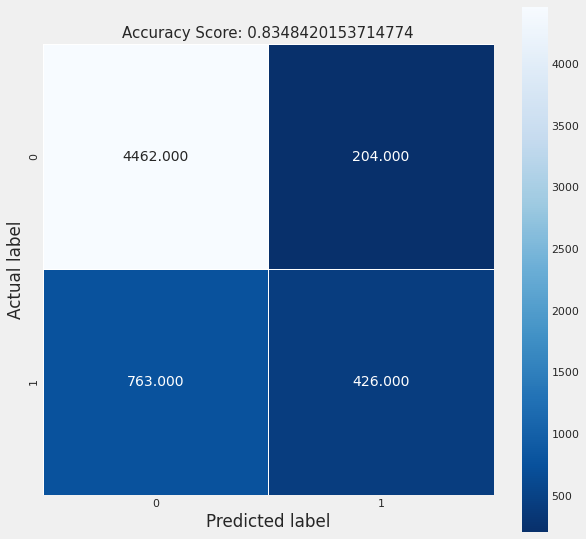

In [126]:
# Heat map for actual and predicted values for logistic regression

cm = metrics.confusion_matrix(y_test1, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

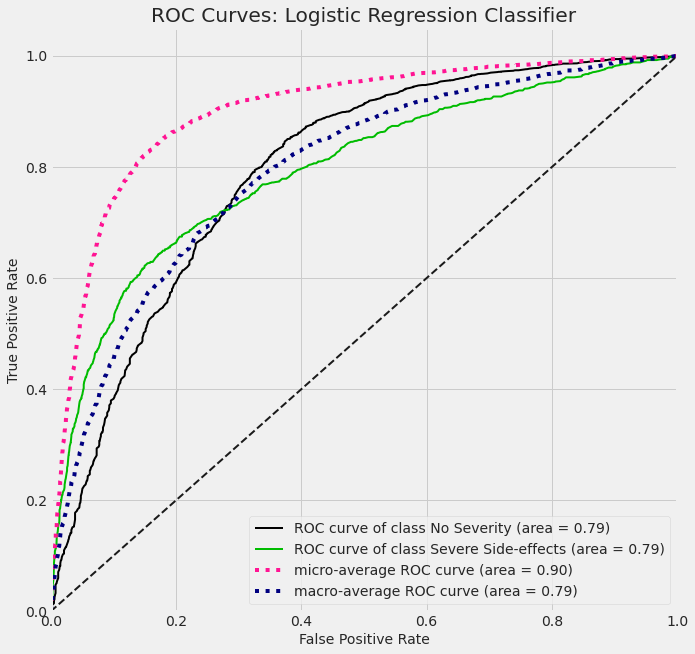

In [127]:
# ROC curve for logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = logreg.predict_proba(X_test1)

skplt.metrics.plot_roc(y_test1, predicted_probas1)
plt.title('ROC Curves: Logistic Regression Classifier')
plt.show()

In [128]:
# Using gradient boosting classifier to predict new two classes
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train1, y_train1)
predictions1 = clf.predict(X_test1)
score = clf.score(X_test1, y_test1)
print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8403074295473953


In [129]:
# Classification report for gradient boosting classifier
print(classification_report(y_test1, predictions1))

                     precision    recall  f1-score   support

        No Severity       0.86      0.95      0.90      4666
Severe Side-effects       0.68      0.41      0.51      1189

           accuracy                           0.84      5855
          macro avg       0.77      0.68      0.71      5855
       weighted avg       0.83      0.84      0.82      5855



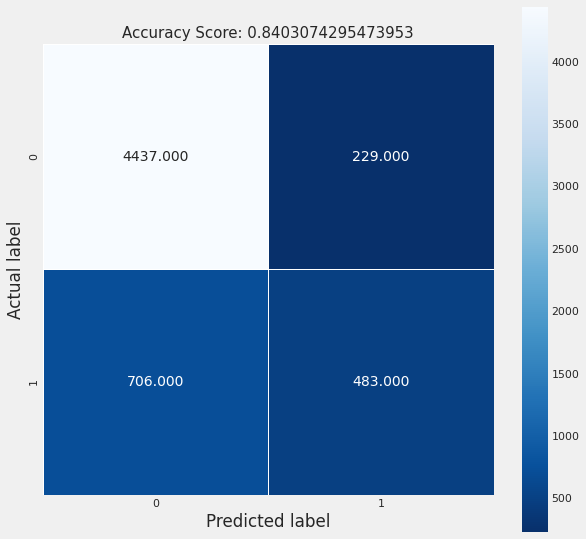

In [130]:
# Heat map for actual and predicted values for gradient boosting classification

cm = metrics.confusion_matrix(y_test1, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

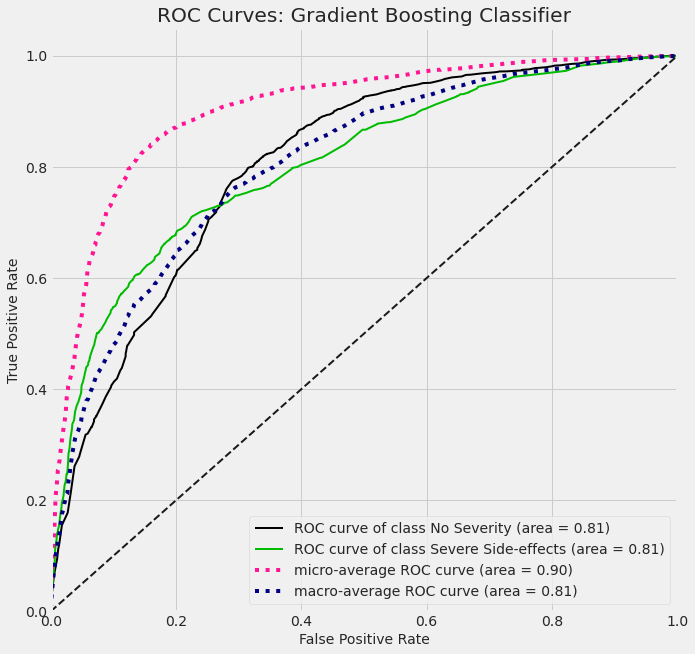

In [131]:
# ROC curve for gradient boosting classifier
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = clf.predict_proba(X_test1)

skplt.metrics.plot_roc(y_test1, predicted_probas1)
plt.title('ROC Curves: Gradient Boosting Classifier')
plt.show()

In [132]:
# Predicting a case using gradient boost classifier
clf.predict([[90,1,1,1]])

array(['Severe Side-effects'], dtype=object)

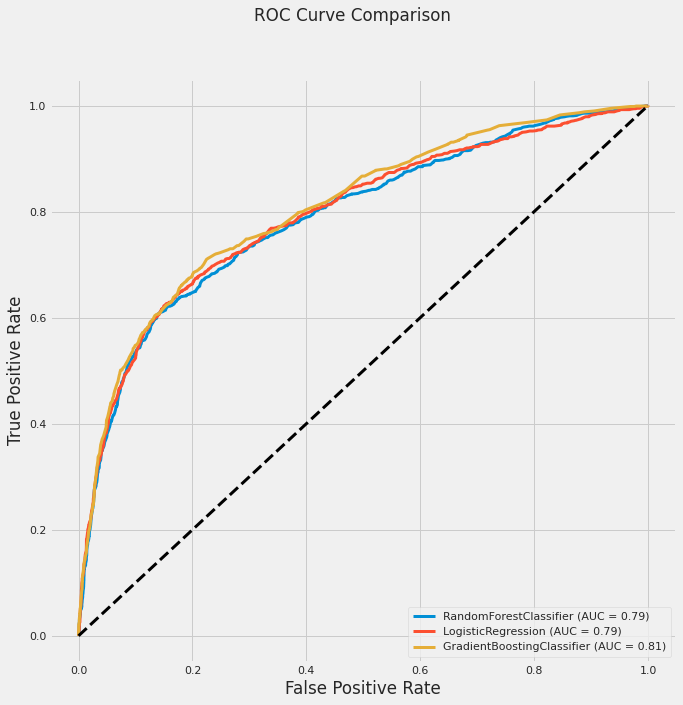

In [133]:
# Comparision of ROC curves
from sklearn.metrics import plot_roc_curve


fig = plot_roc_curve( rf, X_test1, y_test1, lw=3)
fig = plot_roc_curve( logreg, X_test1, y_test1, ax = fig.ax_, lw=3)
fig = plot_roc_curve( clf, X_test1, y_test1, ax = fig.ax_, lw=3)
fig.figure_.suptitle("ROC Curve Comparison")
plt.plot([0,1],[0,1], '--', color='black', lw=3)
plt.show() 

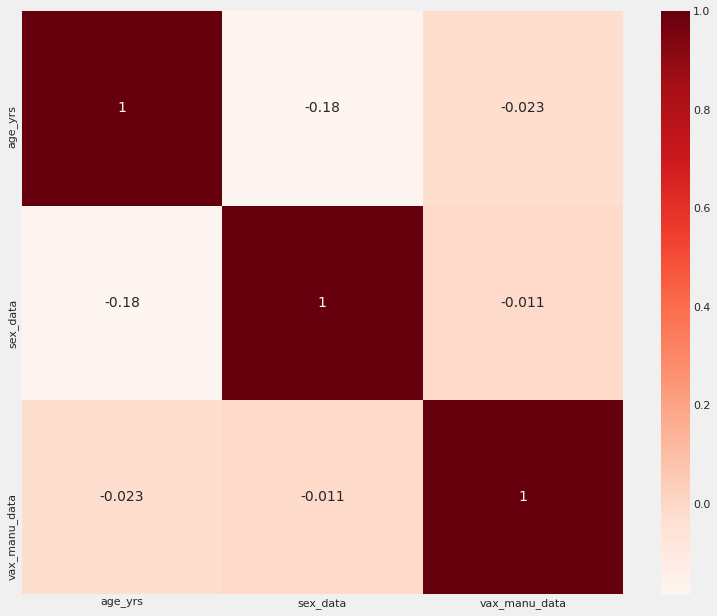

In [134]:
# Using Pearson Correlation to find out correlation between the input variables
plt.figure(figsize=(12,10))
cor = covid_df_target2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [135]:
covid_df_target2.head()

,age_yrs,sex_data,vax_manu_data,history,severity_type
0,33.0,1,0,0,No Severity
1,73.0,1,0,1,No Severity
2,23.0,1,1,0,No Severity
3,58.0,1,0,1,No Severity
4,47.0,1,0,0,No Severity


# Now to avoid the errors due to high value of 'no severity' data, we plan to equalise both the target and input variables and remodel the data using random forest, logistic, and gradient boosting classifiers

In [136]:
# Creating new dataframe - covid_New which only has rows which have severity_type as No severity
covid_New = covid_df2[covid_df2['severity_type'] == 'No Severity']

In [137]:
covid_New.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
1,1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
2,2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1,No Severity
3,3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3,0,0,0,No Severity,1,0,No Severity
4,4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4,0,0,0,No Severity,1,0,No Severity


In [138]:
covid_New['severity_type'].value_counts()

No Severity    23329
Name: severity_type, dtype: int64

In [139]:
# Selecting random 5944 rows from covid_New data frame. (As severity values are 5944)
covid_New = covid_New.sample(n=5944)

In [140]:
covid_New['severity_type'].value_counts()

No Severity    5944
Name: severity_type, dtype: int64

In [141]:
# Creating new dataframe - covid_New2 which only has rows which have severity_type as Severe Side-effects
covid_New2 = covid_df2[covid_df2['severity_type'] == 'Severe Side-effects']

In [142]:
covid_New2['severity_type'].value_counts()
# Both classes now have 5944 rows

Severe Side-effects    5944
Name: severity_type, dtype: int64

In [143]:
# Appending rows of covid_New2 to covid_New and creating a new dataframe - 'covid_New3'
covid_New3 = covid_New.append(covid_New2)

In [144]:
covid_New3['severity_type'].value_counts()

No Severity            5944
Severe Side-effects    5944
Name: severity_type, dtype: int64

In [145]:
# Resetting the index
covid_New3 = covid_New3.reset_index()

In [146]:
covid_New3.head()

,level_0,index,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,16584,17855,938574,CA,74.0,F,0,0,0,0,1,1,0,PFIZER\BIONTECH,3,0,0,0,No Severity,1,1,No Severity
1,19511,21608,1010404,U,43.0,F,0,0,0,0,0,0,0,MODERNA,3,0,0,0,No Severity,1,0,No Severity
2,1018,1045,917729,OR,65.0,F,0,0,0,0,2,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
3,7759,8374,926200,NC,24.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,2,0,0,0,No Severity,1,1,No Severity
4,12593,13624,971291,U,43.0,F,0,0,0,0,0,0,0,MODERNA,4,0,0,0,No Severity,1,0,No Severity


In [147]:
# Selecting the final dataframe with input and target variable
covid_Newfinal = covid_New3[['age_yrs','sex_data','vax_manu_data','history','severity_type']]

In [148]:
covid_Newfinal.head()

,age_yrs,sex_data,vax_manu_data,history,severity_type
0,74.0,1,1,1,No Severity
1,43.0,1,0,0,No Severity
2,65.0,1,0,1,No Severity
3,24.0,1,1,0,No Severity
4,43.0,1,0,0,No Severity


In [149]:
# Creating array of Severity collumn
Newseverity = np.array(covid_New3['severity'])

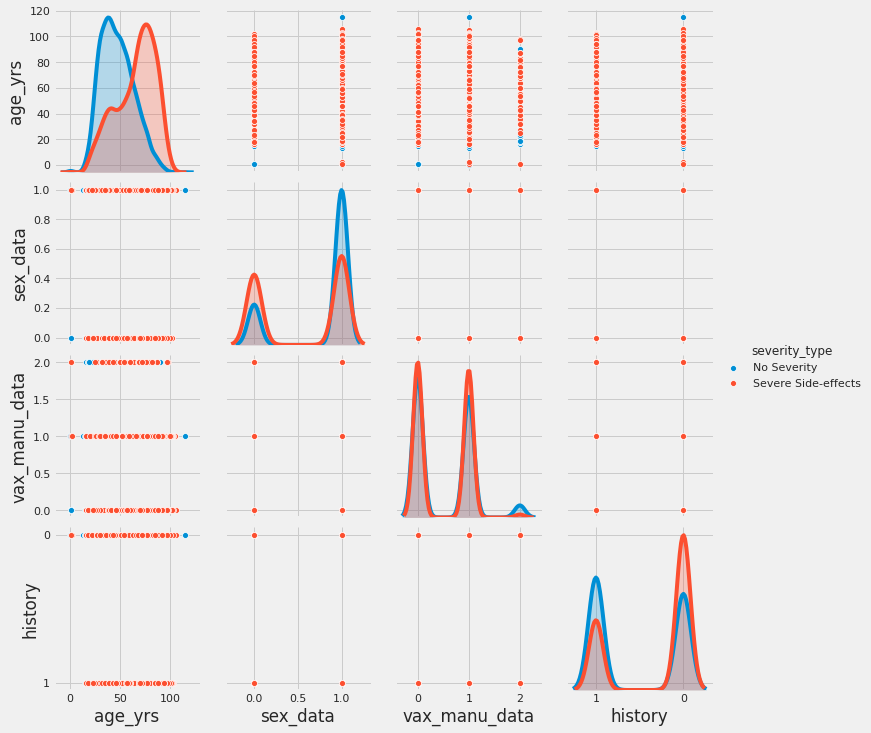

In [150]:
# Pairplot of the variables
sns.pairplot(covid_Newfinal, hue='severity_type')

In [151]:
# Generating the test and train sets one last time
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(covid_Newfinal[['age_yrs','sex_data','vax_manu_data','history']], covid_Newfinal[['severity_type']] , test_size=0.5, stratify=Newseverity, random_state=123456)


In [152]:
# Random Forest classification for balanced classes
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train2, y_train2)

<ipython-input-152-7644afa2b2e0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train2, y_train2)


RandomForestClassifier(oob_score=True, random_state=123456)

In [153]:
# Accuracy of RF model
predicted2 = rf.predict(X_test2)
accuracy = accuracy_score(y_test2, predicted2)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.699
Mean accuracy score: 0.719


<AxesSubplot:>

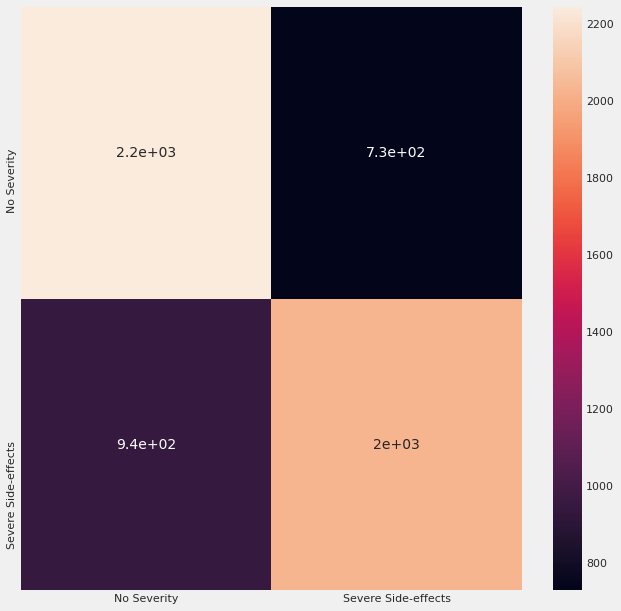

In [154]:
# Heatmap of RF model
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test2, predicted2), columns=Nseverity_Names, index=Nseverity_Names)
sns.heatmap(cm, annot=True)

In [155]:
# Predicting a particular value using RF
rf.predict([[90,0,0,1]])

array(['Severe Side-effects'], dtype=object)

In [156]:
# Classification report for random forest model
print(metrics.classification_report(y_test2, predicted2))
# Better scores for the severe side-effects class

                     precision    recall  f1-score   support

        No Severity       0.70      0.75      0.73      2972
Severe Side-effects       0.74      0.68      0.71      2972

           accuracy                           0.72      5944
          macro avg       0.72      0.72      0.72      5944
       weighted avg       0.72      0.72      0.72      5944



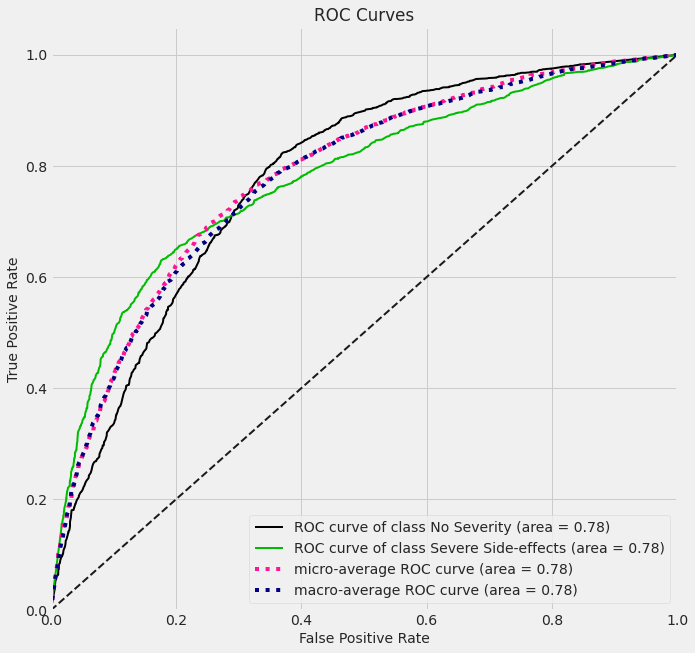

In [157]:
# ROC curve for the random forest model
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas21 = rf.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, predicted_probas21)

plt.show()

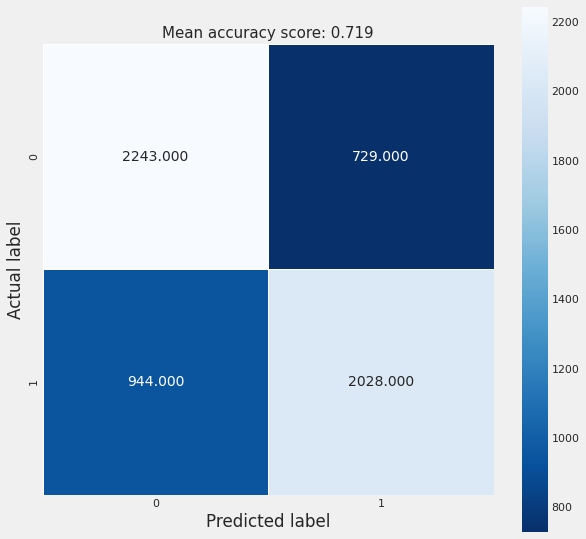

In [158]:
# Heat map for actual and predicted values using RF model

cm = metrics.confusion_matrix(y_test2, predicted2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy:.3}'
plt.title(all_sample_title, size = 15);

In [159]:
# Now using logistic regression to predict balanced classes
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)
predictions2 = logreg.predict(X_test2)
score = logreg.score(X_test2, y_test2)
print(score)

0.730820995962315


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [160]:
# Classification report for logistic regression
print(classification_report(y_test2, predictions2))

                     precision    recall  f1-score   support

        No Severity       0.72      0.75      0.74      2972
Severe Side-effects       0.74      0.71      0.73      2972

           accuracy                           0.73      5944
          macro avg       0.73      0.73      0.73      5944
       weighted avg       0.73      0.73      0.73      5944



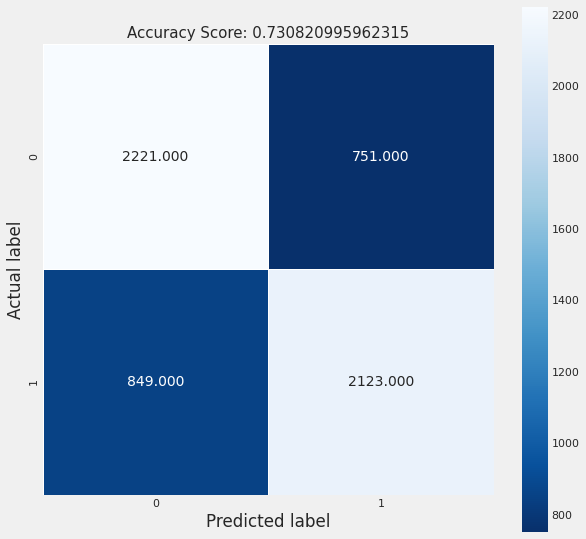

In [161]:
#Heat map for actual and predicted values for logistic regression

cm = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

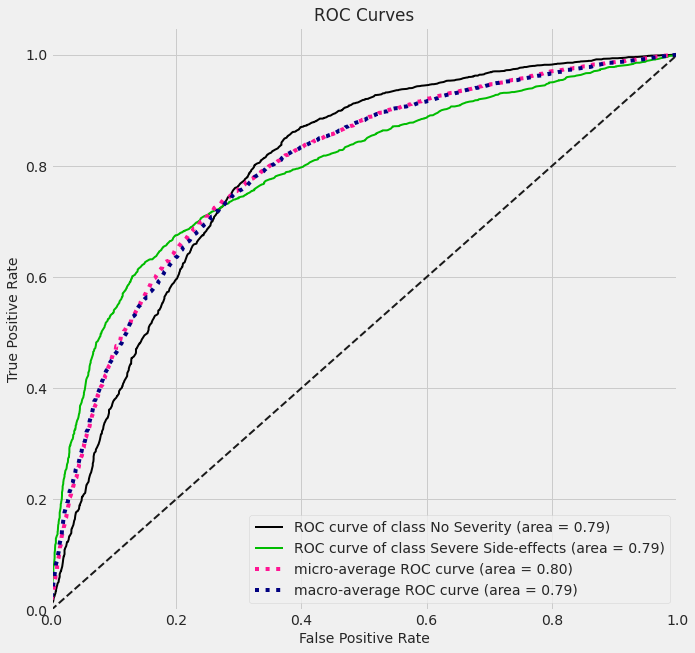

In [162]:
# ROC curve for logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas22 = logreg.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, predicted_probas22)

plt.show()

In [163]:
# Predicting a single case using logistic regression model
logreg.predict([[90,0,0,1]])

array(['Severe Side-effects'], dtype=object)

In [164]:
# Using gradient boosting classifier to predict balanced classes
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train2, y_train2)
predictions2 = clf.predict(X_test2)
score = clf.score(X_test2, y_test2)
print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7437752355316285


In [165]:
# Classification report for gradient boosting classifier
print(classification_report(y_test2, predictions2))

                     precision    recall  f1-score   support

        No Severity       0.71      0.81      0.76      2972
Severe Side-effects       0.78      0.67      0.72      2972

           accuracy                           0.74      5944
          macro avg       0.75      0.74      0.74      5944
       weighted avg       0.75      0.74      0.74      5944



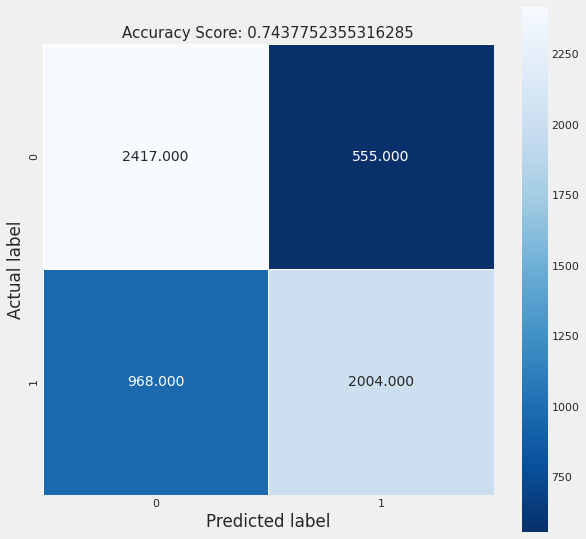

In [166]:
# Heat map for actual and predicted values for gradient boosting classification

cm = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

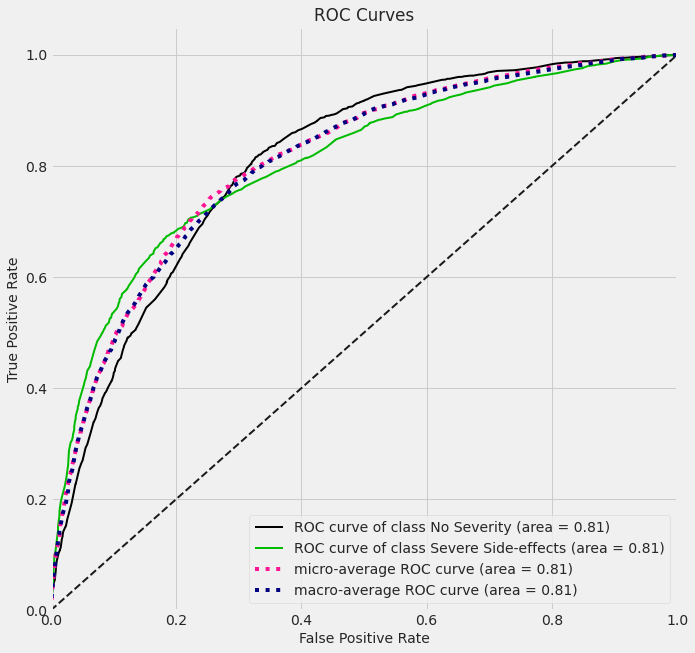

In [167]:
# ROC curve for gradient boosting classifier
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas23 = clf.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, predicted_probas23)

plt.show()

In [168]:
# Predicting a single case using GB classifier
clf.predict([[90,0,0,1]])

array(['Severe Side-effects'], dtype=object)

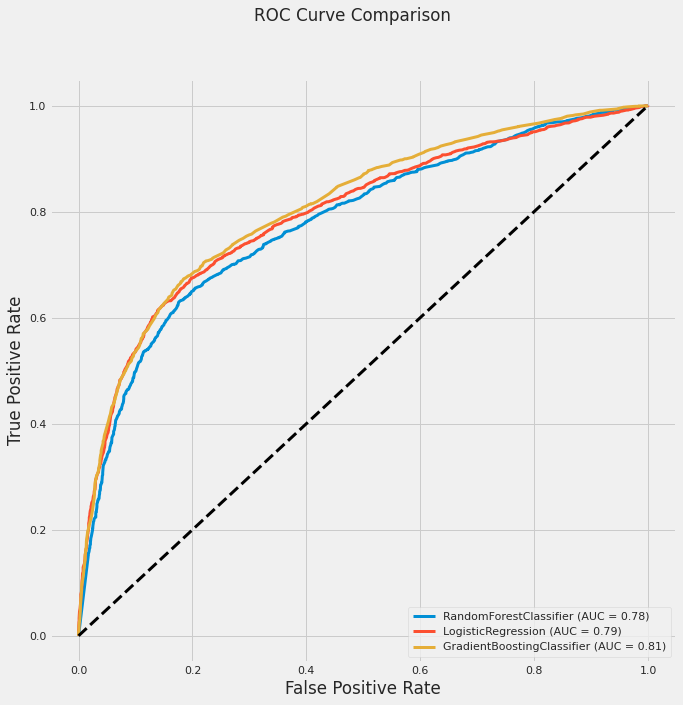

In [169]:
# Comparision of ROC curves after balancing the two classes

from sklearn.metrics import plot_roc_curve

fig = plot_roc_curve( rf, X_test2, y_test2,lw=3)
fig = plot_roc_curve( logreg, X_test2, y_test2, ax = fig.ax_,lw=3)
fig = plot_roc_curve( clf, X_test2, y_test2, ax = fig.ax_,lw=3)
fig.figure_.suptitle("ROC Curve Comparison")
plt.plot([0,1],[0,1],'--',color='black',lw=3)
plt.show() 

In [170]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
1,1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
2,2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1,No Severity
3,3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3,0,0,0,No Severity,1,0,No Severity
4,4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4,0,0,0,No Severity,1,0,No Severity


In [171]:
covid_comp = covid_df2[['age_yrs','sex','severity','severity_type']]

In [172]:
covid_comp.head()

,age_yrs,sex,severity,severity_type
0,33.0,F,0,No Severity
1,73.0,F,0,No Severity
2,23.0,F,0,No Severity
3,58.0,F,0,No Severity
4,47.0,F,0,No Severity


In [173]:
# Split the dataframe into two groups: No severity and severity. Subset just the age variable

No_Severity_age = covid_comp[covid_comp['severity'] == 0]['age_yrs']
Severity_age = covid_comp[covid_comp['severity'] == 1]['age_yrs']

In [174]:
# Normality test for no severity age
# P-value is significant so no-severity_age is non-gaussian
from scipy import stats
stats.normaltest(No_Severity_age)

NormaltestResult(statistic=737.0026831441871, pvalue=9.160111947441657e-161)

In [175]:
# P-value is significant so severity age is non-gaussian
stats.normaltest(Severity_age)

NormaltestResult(statistic=450.82866193775004, pvalue=1.2699888800188004e-98)

In [176]:
# Conduct mann whitney test to test for significant difference between the two groups
stats.mannwhitneyu(No_Severity_age,Severity_age)

MannwhitneyuResult(statistic=32459234.0, pvalue=0.0)

In [177]:
No_Severity_age.describe()

count    23329.000000
mean        47.431866
std         16.040632
min          0.000000
25%         35.000000
50%         46.000000
75%         58.000000
max        115.000000
Name: age_yrs, dtype: float64

In [178]:
Severity_age.describe()

count    5944.000000
mean       65.932705
std        19.470628
min         1.000000
25%        52.000000
50%        70.000000
75%        81.000000
max       106.000000
Name: age_yrs, dtype: float64

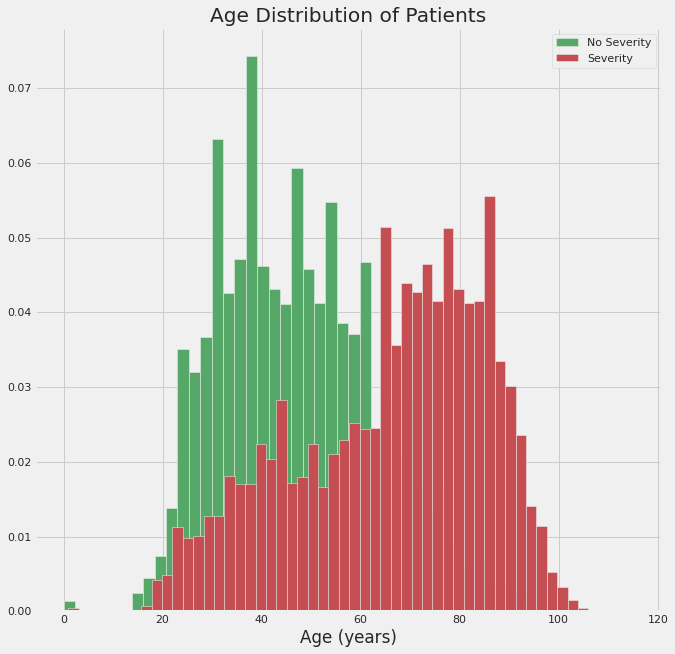

In [179]:
# Age distribution visual grouped by no severity and severity

plt.hist(No_Severity_age, bins=50, weights = np.array(len(No_Severity_age)*[1.0])/len(No_Severity_age),color='g', label = 'No Severity')
plt.hist(Severity_age, bins=50, weights = np.array(len(Severity_age)*[1.0])/len(Severity_age),color='r', label = 'Severity')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Density plot for age of patients with severity and No Severity')

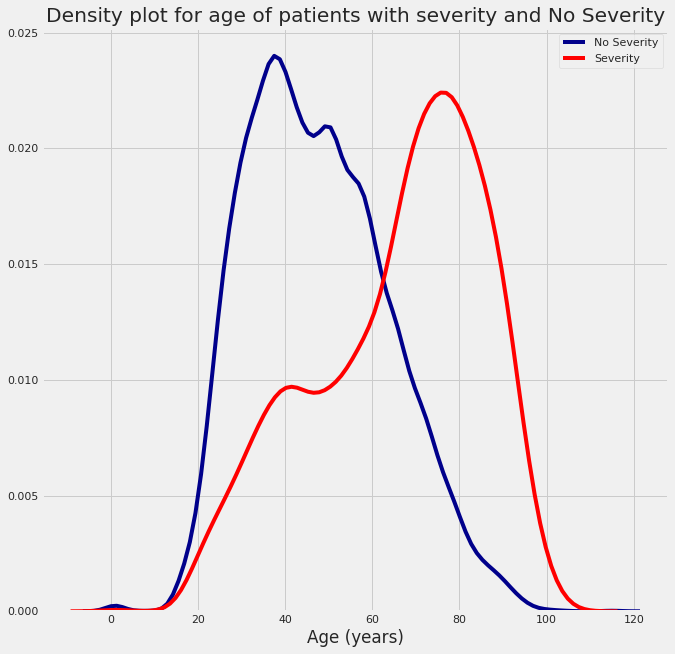

In [180]:
# Density plot of age split by no severity and severity groups

sns.distplot(No_Severity_age, hist=False, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},label = 'No Severity')
sns.distplot(Severity_age, hist=False, kde=True, bins=50, color = 'red', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}, label = 'Severity')
plt.xlabel('Age (years)')
plt.legend()
plt.title('Density plot for age of patients with Severity and No Severity')

# Linear Regression Modeling

In [181]:
# Create a linear regression model. IV = 'numdays' DV = 'symptom_count'
# Can we predict symptom count based upon the number of days from vaccination to onset?

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random

random.seed(100)
linreg = LinearRegression()

X_lin = covid_df2[['numdays']]
y_lin = covid_df2['symptom_count']

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.20, random_state=0)
linreg.fit(X_train_lin,y_train_lin)
predicted_lin = linreg.predict(X_test_lin)
expected_lin = y_test_lin

In [182]:
# Evaluation of the Linear Regression Model
# The coefficient
print("Coefficients: \n", linreg.coef_)
# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(expected_lin, predicted_lin)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % metrics.r2_score(expected_lin, predicted_lin))

Coefficients: 
 [-0.01809771]
Root mean squared error: 3.41
Coefficient of determination: -0.00045


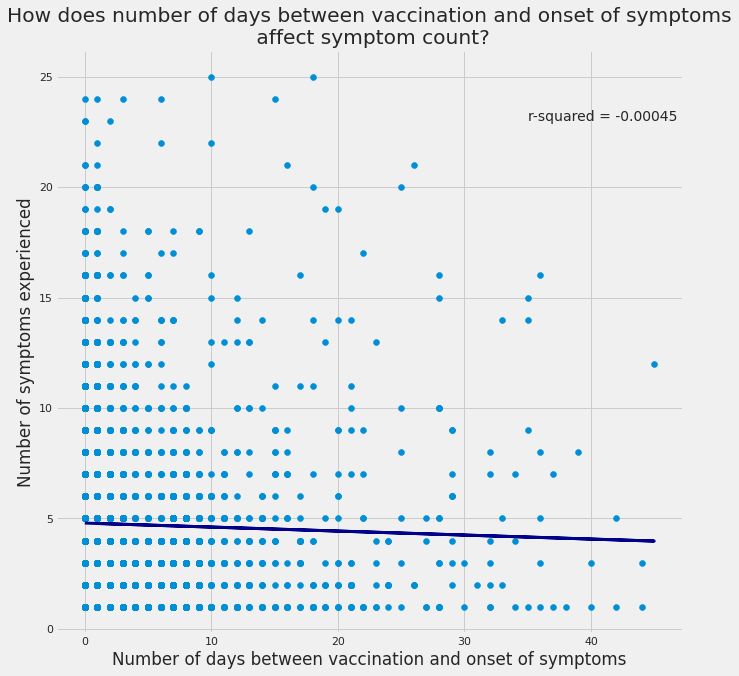

In [183]:
# Create a graph of numdays vs. symptom count + regression line of fit

plt.style.use('fivethirtyeight')
plt.scatter(X_test_lin,y_test_lin)
plt.plot(X_test_lin,predicted_lin, color='darkblue', lw=3)
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Number of symptoms experienced')
plt.title('How does number of days between vaccination and onset of symptoms\n affect symptom count?')
plt.annotate("r-squared = {:.5f}".format(metrics.r2_score(expected_lin, predicted_lin)), (35, 23))
plt.show()

In [184]:
# Create a polynomial regression model based on degree=3

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X_poly = np.array(covid_df2['numdays'].values)
y_poly = np.array(covid_df2['symptom_count'].values)

# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_poly.reshape(-1,1),y_poly.reshape(-1,1))
poly_pred=pipe.predict(X_poly.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_poly,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

In [185]:
# Evaluation of the Polynomial (cubic) Regression Model

# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_poly, poly_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % metrics.r2_score(y_poly, poly_pred))

Root mean squared error: 3.47
Coefficient of determination: -0.00261


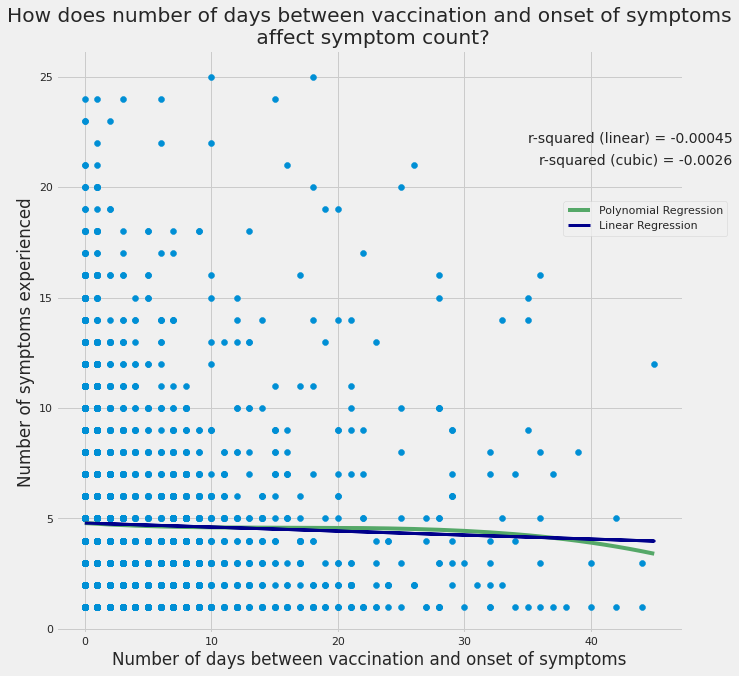

In [186]:
# Plotting predictions for linear and cubic fit regression

plt.style.use('fivethirtyeight')
plt.scatter(X_test_lin,y_test_lin)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.plot(X_test_lin,predicted_lin, color='darkblue', lw=3, label='Linear Regression')
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Number of symptoms experienced')
plt.title('How does number of days between vaccination and onset of symptoms\n affect symptom count?')
plt.annotate("r-squared (linear) = {:.5f}".format(metrics.r2_score(expected_lin, predicted_lin)), (35, 22))
plt.annotate("r-squared (cubic) = {:.4f}".format(metrics.r2_score(y_poly, poly_pred)), (35.9, 21))
plt.legend(loc='upper right', bbox_to_anchor=(1.08,.75))
plt.show()

In [187]:
# Reject the null hypothesis that the data comes from a normal distribution
# which means numdays is non-parametric

from scipy import stats
stats.normaltest(covid_df2['numdays'])

NormaltestResult(statistic=21296.971938060684, pvalue=0.0)

In [188]:
# Reject the null hypothesis that the data comes from a normal distribution
# which means symptom_count is non-parametric

stats.normaltest(covid_df2['symptom_count'])

NormaltestResult(statistic=10260.897636006532, pvalue=0.0)

In [189]:
# Because our data is non-parametric, we need to use a spearman rank  or kendall's correlation test to test our hypothesis
# null hypothesis: there is no relationship between numdays and symptom_count
# alt hypothesis: there is a relationship between numdays and symptom_count
stats.spearmanr(covid_df2['numdays'],covid_df2['symptom_count'])

SpearmanrResult(correlation=-0.02407431382474003, pvalue=3.798920506484018e-05)

In [190]:
# Since kendall tau correlation p-value is more significant than spearman's, we will claim kendall tau correlation coefficient
stats.kendalltau(covid_df2['numdays'],covid_df2['symptom_count'])

KendalltauResult(correlation=-0.018973098419589215, pvalue=2.8124276366500103e-05)